<a href="https://colab.research.google.com/github/aborundiya/CNN/blob/master/MNIST_UsingLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transform
from torch import nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Import Data set

In [0]:

trainset = torchvision.datasets.MNIST('./data', train=True,download=True, transform=transform.ToTensor())

In [0]:
classes = ("Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine")
trainloader = torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [36]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

torch.Size([4, 1, 28, 28])


In [0]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet,self).__init__()
    self.cnnModel = nn.Sequential(
        nn.Conv2d(1,6,5),     # (N , 1, 28, 28 ) - > ( N , 6, 24,24)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),  # (N,6,24,24)  - > ( N, 6, 12,12)
        nn.Conv2d(6,16,5) ,       # ( N, 6, 12, 12 ) - > (N, 16,8, 8)
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2)  # (N,16, 8,8) -> (N,16, 4, 4)
    )
    self.fcModel = nn.Sequential(
        nn.Linear(256,120),     # (N, 256)  -> ( N , 120)
        nn.ReLU(),
        nn.Linear(120,84),     # (N,120)  -> ( N ,84)
        nn.ReLU(),
        nn.Linear(84,10)      #(N,84 )  -> ( N ,10)
    )

  def forward(self,x):
    #print(x.shape)
    x = self.cnnModel(x)
    #print(x.shape)
    x = x.view(x.size(0),-1)  # flatten the Tensor with same size of N
    #print(x.shape)
    x = self.fcModel(x)
    #print(x.shape)
    return x


In [0]:
net = LeNet()
out = net(images)

In [39]:
print(out)

tensor([[ 0.0106, -0.1387, -0.0499, -0.0651, -0.0376,  0.0420, -0.0088,  0.0700,
          0.0260,  0.0187],
        [ 0.0071, -0.1386, -0.0463, -0.0640, -0.0434,  0.0470, -0.0092,  0.0679,
          0.0293,  0.0200],
        [ 0.0091, -0.1387, -0.0440, -0.0627, -0.0476,  0.0429, -0.0092,  0.0683,
          0.0358,  0.0195],
        [ 0.0129, -0.1429, -0.0498, -0.0609, -0.0413,  0.0443, -0.0140,  0.0656,
          0.0280,  0.0246]], grad_fn=<AddmmBackward>)


In [0]:
max_value , pred_class = torch.max(out.data,1)

# Training the LeNet with CIFAR10 dataset

In [0]:
batch_size = 128 
trainSet = torchvision.datasets.MNIST('./data',train=True,download=True,transform=transform.ToTensor())
trainLoader = torch.utils.data.DataLoader(trainSet,batch_size=batch_size,shuffle=True)
testSet = torchvision.datasets.MNIST('./data',train=False,download=True,transform=transform.ToTensor())
testLoader = torch.utils.data.DataLoader(testSet,batch_size=batch_size,shuffle=False)



In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluate(dataLoader):
  total , correct = 0 ,0 
  for data in dataLoader:
    inputs, labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct +=(pred == labels).sum().item()
  return 100 * (correct / total)

In [0]:
net = LeNet().to(device)
import torch.optim as optim 
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


Epoch 0 16 , Test acc : 94.68, Train Acc : 94.33
Epoch 1 16 , Test acc : 96.41, Train Acc : 96.29
Epoch 2 16 , Test acc : 97.69, Train Acc : 97.80
Epoch 3 16 , Test acc : 98.03, Train Acc : 98.22
Epoch 4 16 , Test acc : 98.12, Train Acc : 98.27
Epoch 5 16 , Test acc : 98.36, Train Acc : 98.56
Epoch 6 16 , Test acc : 98.57, Train Acc : 98.91
Epoch 7 16 , Test acc : 98.74, Train Acc : 99.13
Epoch 8 16 , Test acc : 98.75, Train Acc : 99.04
Epoch 9 16 , Test acc : 98.61, Train Acc : 99.23
Epoch 10 16 , Test acc : 98.50, Train Acc : 99.24
Epoch 11 16 , Test acc : 98.87, Train Acc : 99.19
Epoch 12 16 , Test acc : 98.87, Train Acc : 99.48
Epoch 13 16 , Test acc : 98.90, Train Acc : 99.55
Epoch 14 16 , Test acc : 98.76, Train Acc : 99.46
Epoch 15 16 , Test acc : 98.89, Train Acc : 99.48


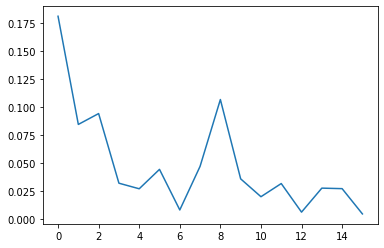

CPU times: user 2min 28s, sys: 836 ms, total: 2min 29s
Wall time: 2min 29s


In [45]:
%%time
loss_arr = []
loss_arr_epoch = []
max_epochs = 16 

for epoch in range(max_epochs):
  for i , data in enumerate(trainLoader,0):
    inputs , labels = data 
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_arr_epoch.append(loss.item())
  print("Epoch %d %d , Test acc : %0.2f, Train Acc : %0.2f" % (epoch, max_epochs, evaluate(testLoader),evaluate(trainLoader)))
plt.plot(loss_arr_epoch)
plt.show()

#Basic Visulaization

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

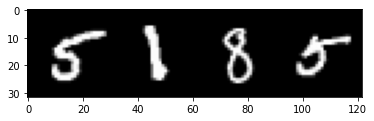

In [47]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [49]:
out - net(images)
print(out.shape)

torch.Size([4, 10])


In [50]:
out = net.cnnModel[0](images)
print(out.shape)

torch.Size([4, 6, 24, 24])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


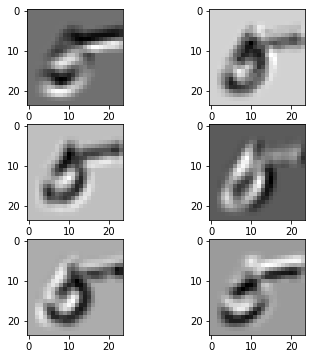

In [52]:
plt.figure(figsize=(6,6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3,2,i+1)
  plt.imshow(out[image_id, i , : ,:].detach().numpy(), cmap = 'binary')